In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import numpy as np

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/df_f8.csv')

# 사고 발생 변수 생성
# 사고 건수가 1 이상이면 1, 1이면 0
df['사고 발생'] = df['사고건수'].apply(lambda x: 1 if x > 1 else 0)

# 타겟 변수 분포 확인
print("사고 발생 변수 분포:")
print(df['사고 발생'].value_counts())

# 필요한 열 선택 및 타겟 변수 생성
columns = ['사고요일', '사고시', '시군구', '사고 발생']
df = df[columns]

# 카테고리 변수 인코딩
label_encoders = {}
for column in ['사고요일', '사고시', '시군구']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 입력 변수와 타겟 변수 분리
X = df.drop(columns=['사고 발생'])
y = df['사고 발생']

# SMOTE를 사용하여 클래스 비율 조정
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습용과 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=500, max_depth=5, learning_rate=0.2)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report_result)
print("Accuracy:", accuracy)
# 예측 함수 정의
def predict_accident(day, hour, district):
    day_encoded = label_encoders['사고요일'].transform([day])[0]
    hour_encoded = label_encoders['사고시'].transform([hour])[0]
    district_encoded = label_encoders['시군구'].transform([district])[0]

    input_data = pd.DataFrame([[day_encoded, hour_encoded, district_encoded]], columns=['사고요일', '사고시', '시군구'])
    probability = model.predict_proba(input_data)[0][1]
    return probability

# 특정 조건에 따른 사고 발생 가능성 예측 예시
# 예시: 금요일, 22시, 서울특별시 강남구 역삼동에서 사고 발생 가능성 예측
day = '일요일'
hour = '22시'
district = '서울특별시 강남구 역삼동'

probability = predict_accident(day, hour, district)
probability

사고 발생 변수 분포:
사고 발생
0    3999
1    2249
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       802
           1       0.79      0.85      0.82       798

    accuracy                           0.81      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.82      0.81      0.81      1600

Accuracy: 0.81375


0.938214

사고 발생 변수 분포:
사고 발생
0    3999
1    2249
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       802
           1       0.73      0.73      0.73       798

    accuracy                           0.73      1600
   macro avg       0.73      0.73      0.73      1600
weighted avg       0.73      0.73      0.73      1600

Accuracy: 0.730625
Train Accuracy: 0.776023757424195
Test Accuracy: 0.730625


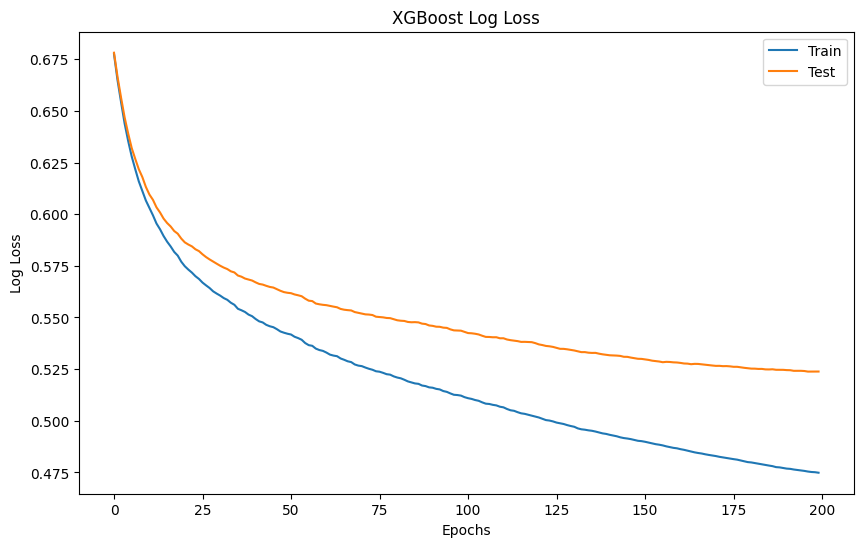

일요일 22시 서울특별시 강남구 역삼동에서의 사고 발생 가능성: 89.40%


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/df_f8.csv')

# 사고 발생 변수 생성
# 사고 건수가 1 이상이면 1, 1이면 0
df['사고 발생'] = df['사고건수'].apply(lambda x: 1 if x > 1 else 0)

# 타겟 변수 분포 확인
print("사고 발생 변수 분포:")
print(df['사고 발생'].value_counts())

# 필요한 열 선택 및 타겟 변수 생성
columns = ['사고요일', '사고시', '시군구', '사고 발생']
df = df[columns]

# 카테고리 변수 인코딩
label_encoders = {}
for column in ['사고요일', '사고시', '시군구']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 입력 변수와 타겟 변수 분리
X = df.drop(columns=['사고 발생'])
y = df['사고 발생']

# SMOTE를 사용하여 클래스 비율 조정
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습용과 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# XGBoost 모델 학습 (수정된 파라미터)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200, max_depth=3, learning_rate=0.1, reg_alpha=0.1, reg_lambda=0.1)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10, verbose=False)

# 예측 및 평가
y_pred = model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report_result)
print("Accuracy:", accuracy)

# 학습 데이터와 검증 데이터의 성능 비교
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# 학습 곡선 그리기
evals_result = model.evals_result()

epochs = len(evals_result['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['validation_0']['logloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['logloss'], label='Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# 예측 함수 정의
def predict_accident(day, hour, district):
    day_encoded = label_encoders['사고요일'].transform([day])[0]
    hour_encoded = label_encoders['사고시'].transform([hour])[0]
    district_encoded = label_encoders['시군구'].transform([district])[0]

    input_data = pd.DataFrame([[day_encoded, hour_encoded, district_encoded]], columns=['사고요일', '사고시', '시군구'])
    probability = model.predict_proba(input_data)[0][1]
    return probability

# 특정 조건에 따른 사고 발생 가능성 예측 예시
# 예시: 일요일, 22시, 서울특별시 강남구 역삼동에서 사고 발생 가능성 예측
day = '일요일'
hour = '22시'
district = '서울특별시 강남구 역삼동'

probability = predict_accident(day, hour, district)
print(f'일요일 22시 서울특별시 강남구 역삼동에서의 사고 발생 가능성: {probability:.2%}')

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import numpy as np

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/df_f8.csv')

# 사고 발생 변수 생성
# 사고 건수가 1 이상이면 1, 1이면 0
df['사고 발생'] = df['사고건수'].apply(lambda x: 1 if x > 1 else 0)

# 타겟 변수 분포 확인
print("사고 발생 변수 분포:")
print(df['사고 발생'].value_counts())

# 필요한 열 선택 및 타겟 변수 생성
columns = ['사고요일', '사고시', '시군구', '사고 발생']
df = df[columns]

# 카테고리 변수 인코딩
label_encoders = {}
for column in ['사고요일', '사고시', '시군구']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 입력 변수와 타겟 변수 분리
X = df.drop(columns=['사고 발생'])
y = df['사고 발생']

# SMOTE를 사용하여 클래스 비율 조정
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습용과 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report_result)
print("Accuracy:", accuracy)

사고 발생 변수 분포:
사고 발생
0    3999
1    2249
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       802
           1       0.70      0.73      0.71       798

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600

Accuracy: 0.708125


In [ ]:
# 예측 함수 정의
def predict_accident(day, hour, district):
    day_encoded = label_encoders['사고요일'].transform([day])[0]
    hour_encoded = label_encoders['사고시'].transform([hour])[0]
    district_encoded = label_encoders['시군구'].transform([district])[0]

    input_data = pd.DataFrame([[day_encoded, hour_encoded, district_encoded]], columns=['사고요일', '사고시', '시군구'])
    probability = model.predict_proba(input_data)[0][1]
    return probability

# 특정 조건에 따른 사고 발생 가능성 예측 예시
# 예시: 금요일, 22시, 서울특별시 강남구 역삼동에서 사고 발생 가능성 예측
day = '일요일'
hour = '22시'
district = '서울특별시 구로구 구로동'

probability = predict_accident(day, hour, district)
probability

0.73077315

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import numpy as np

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/df_f8.csv')

# 사고 발생 변수 생성
# 사고 건수가 1이면 0, 그 이상이면 1
df['사고 발생'] = df['사고건수'].apply(lambda x: 1 if x > 1 else 0)

# 타겟 변수 분포 확인
print("사고 발생 변수 분포:")
print(df['사고 발생'].value_counts())

# 필요한 열 선택 및 타겟 변수 생성
columns = ['사고요일', '사고시', '시군구', '사고 발생']
df = df[columns]

# 데이터 증강
# 사고 발생이 0인 데이터 (사고건수 1인 데이터) 줄이기
df_minority = df[df['사고 발생'] == 0]
df_majority = df[df['사고 발생'] == 1]

# 사고 발생이 0인 데이터 (사고건수 1인 데이터)를 샘플링하여 줄이기
df_minority_downsampled = df_minority.sample(n=len(df_majority), random_state=42)

# 데이터 병합
df_balanced = pd.concat([df_minority_downsampled, df_majority])

# 카테고리 변수 인코딩
label_encoders = {}
for column in ['사고요일', '사고시', '시군구']:
    le = LabelEncoder()
    df_balanced[column] = le.fit_transform(df_balanced[column])
    label_encoders[column] = le

# 입력 변수와 타겟 변수 분리
X = df_balanced.drop(columns=['사고 발생'])
y = df_balanced['사고 발생']

# SMOTE를 사용하여 클래스 비율 조정
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습용과 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report_result)
print("Accuracy:", accuracy)

# 예측 함수 정의
def predict_accident(day, hour, district):
    day_encoded = label_encoders['사고요일'].transform([day])[0]
    hour_encoded = label_encoders['사고시'].transform([hour])[0]
    district_encoded = label_encoders['시군구'].transform([district])[0]

    input_data = pd.DataFrame([[day_encoded, hour_encoded, district_encoded]], columns=['사고요일', '사고시', '시군구'])
    probability = model.predict_proba(input_data)[0][1]
    return probability

# 특정 조건에 따른 사고 발생 가능성 예측 예시
# 예시: 금요일, 22시, 서울특별시 강남구 역삼동에서 사고 발생 가능성 예측
day = '금요일'
hour = '22시'
district = '서울특별시 강남구 역삼동'

probability = predict_accident(day, hour, district)
print(f'금요일 22시 서울특별시 강남구 역삼동에서의 사고 발생 가능성: {probability:.2%}')


사고 발생 변수 분포:
사고 발생
0    3999
1    2249
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       475
           1       0.65      0.72      0.68       425

    accuracy                           0.68       900
   macro avg       0.68      0.68      0.68       900
weighted avg       0.69      0.68      0.68       900

Accuracy: 0.6822222222222222
금요일 22시 서울특별시 강남구 역삼동에서의 사고 발생 가능성: 91.39%
